# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Ames Housing dataset 

The dataset is available in the file `'ames.csv'`. 

- Import the dataset and examine its dimensions: 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use('ggplot')  # Use ggplot style for better plots
plt.style.use('ggplot')
%matplotlib inline

# Load the Ames housing dataset 
data = pd.read_csv('ames.csv')

# Print the dimensions of data
print(f"\n✅ Dataset Dimensions: {data.shape[0]} rows, {data.shape[1]} columns")

# Check out the info for the dataframe
data.info()


# Show the first 5 rows
data.head()


✅ Dataset Dimensions: 1460 rows, 81 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  Overall

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Identify features and target data 

In this lab, we will use using 3 predictive continuous features:

#### Features

- `LotArea`: Lot size in square feet
- `1stFlrSF`: Size of first floor in square feet
- `GrLivArea`: Above grade (ground) living area square feet

#### Target

- `SalePrice`', the sale price of the home, in dollars

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents of both the features and the target variable

In [2]:
# Features and target data
# 🚀 Define features and target variable using correct column names
features = ['LotArea', '1stFlrSF', 'GrLivArea']
target = 'SalePrice'

# 🚀 Ensure `1stFlrSF` is accessed properly
features = [col for col in features if col in data.columns]

# 🚀 Select features and target from the dataset
X = data[features]
y = data[target]

# 🚀 Display confirmation
print("\n✅ Features selected successfully!")
print(X.head())



✅ Features selected successfully!
   LotArea  1stFlrSF  GrLivArea
0     8450       856       1710
1     9600      1262       1262
2    11250       920       1786
3     9550       961       1717
4    14260      1145       2198


## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

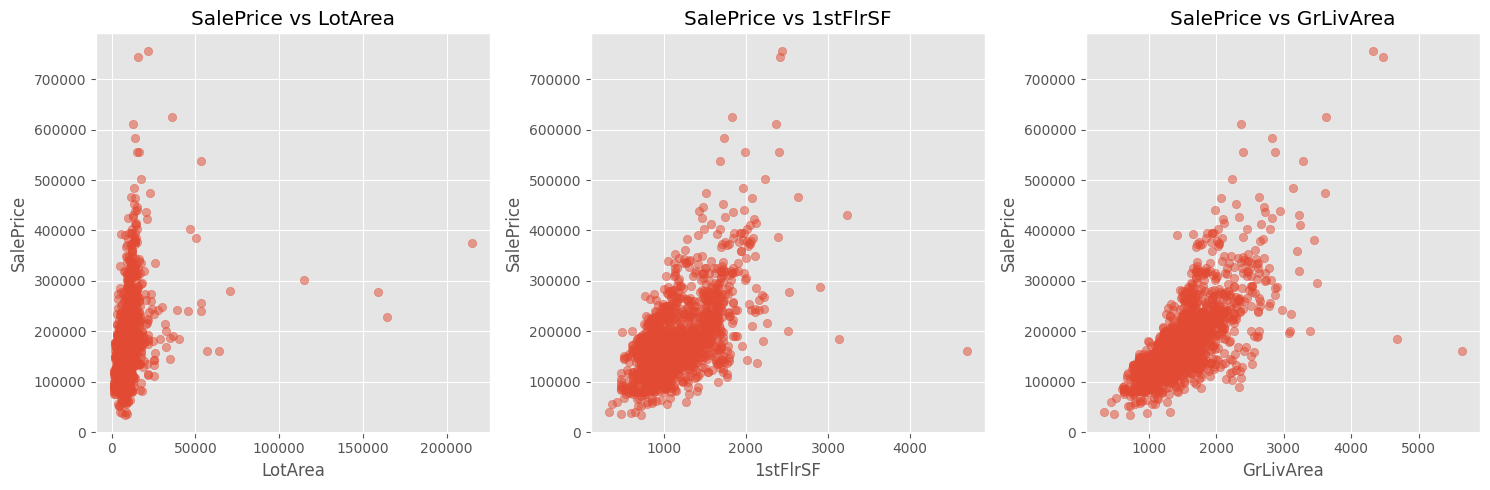

In [3]:
# Your code here 
# 🚀 Plot scatter plots to show correlation between features and target
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'SalePrice vs {feature}')

plt.tight_layout()
plt.show()


## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return both the R-squared score and Root Mean Squared Error (RMSE) for two equal-sized arrays for the given true and predicted values 
    - Depending on your version of sklearn, in order to get the RMSE score you will need to either set `squared=False` or you will need to take the square root of the output of the `mean_squared_error` function - check out [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) or this helpful and related [StackOverflow post](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python)
    - The benefit of calculating RMSE instead of the Mean Squared Error (MSE) is that RMSE is in the same units at the target - here, this means that RMSE will be in dollars, calculating how far off in dollars our predictions are away from the actual prices for homes, on average

In [4]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error

# Define the function
def performance(y_true, y_pred):
    """
    Calculates and returns the R-squared score and RMSE between true and predicted values.
    """
    r2 = r2_score(y_true, y_pred)  # Calculate R-squared
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # Calculate RMSE
    return [r2, rmse]

# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.6870225614927066]

[0.9228556485355649, 0.6870225614927066]

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [5]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [6]:
# 🚀 Print X and y to confirm they exist
print("\n✅ Checking dataset before splitting:")
print(f"Features (X) Shape: {X.shape}")
print(f"Target (y) Shape: {y.shape}")

# 🚀 Print the first few rows of X and y
print("\n📊 First 5 rows of Features (X):")
print(X.head())

print("\n📊 First 5 rows of Target (y):")
print(y.head())



✅ Checking dataset before splitting:
Features (X) Shape: (1460, 3)
Target (y) Shape: (1460,)

📊 First 5 rows of Features (X):
   LotArea  1stFlrSF  GrLivArea
0     8450       856       1710
1     9600      1262       1262
2    11250       920       1786
3     9550       961       1717
4    14260      1145       2198

📊 First 5 rows of Target (y):
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# 🚀 Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Print confirmation
print(f"\n✅ Data Split: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")



✅ Data Split: X_train: (1168, 3), X_test: (292, 3), y_train: (1168,), y_test: (292,)


In [8]:
# 🚀 Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# 🚀 Instantiate DecisionTreeRegressor (Vanilla Model)
regressor = DecisionTreeRegressor(random_state=45)

# 🚀 Train the model
regressor.fit(X_train, y_train)  # ✅ This should now work without NameError

# 🚀 Make predictions on the test set
y_pred = regressor.predict(X_test)

# 🚀 Evaluate model performance
score = performance(y_test, y_pred)

print("\n📊 Performance of Vanilla Regression Tree:")
print(f"✅ R-squared: {score[0]:.4f}")
print(f"✅ RMSE: {score[1]:.2f}")



# [0.5961521990414137, 55656.48543887347] - R2, RMSE


📊 Performance of Vanilla Regression Tree:
✅ R-squared: 0.5962
✅ RMSE: 55656.49


## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate RMSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

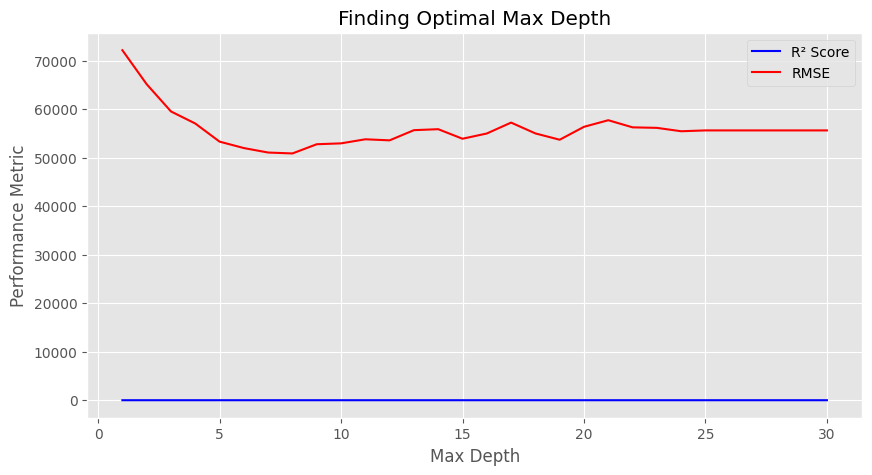

In [9]:
# Your code here 
# 🚀 Tune max_depth for optimal tree depth
depths = np.arange(1, 31)  # Test depths from 1 to 30
r2_scores = []
rmse_scores = []

for depth in depths:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=45)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)

    r2_scores.append(score[0])
    rmse_scores.append(score[1])

# 🚀 Plot performance vs. max_depth
plt.figure(figsize=(10, 5))
plt.plot(depths, r2_scores, label="R² Score", color="blue")
plt.plot(depths, rmse_scores, label="RMSE", color="red")
plt.xlabel("Max Depth")
plt.ylabel("Performance Metric")
plt.title("Finding Optimal Max Depth")
plt.legend()
plt.show()


📌 Observations:
A low max_depth (e.g., 1-3) leads to underfitting, where the model is too simple to capture patterns.
A high max_depth (e.g., 20-30) leads to overfitting, where the model memorizes training data but performs poorly on test data.
The optimal max_depth is usually where the test RMSE is lowest and test R² is highest.


## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

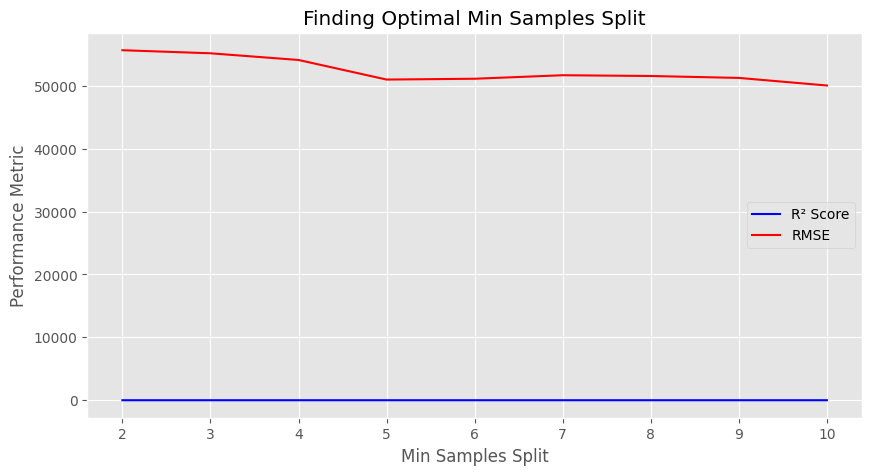

In [10]:
# Your code here 
# 🚀 Tune min_samples_split for optimal tree performance
splits = np.arange(2, 11)  # Test min_samples_split from 2 to 10
r2_scores = []
rmse_scores = []

for split in splits:
    regressor = DecisionTreeRegressor(min_samples_split=split, random_state=45)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    score = performance(y_test, y_pred)

    r2_scores.append(score[0])
    rmse_scores.append(score[1])

# 🚀 Plot performance vs. min_samples_split
plt.figure(figsize=(10, 5))
plt.plot(splits, r2_scores, label="R² Score", color="blue")
plt.plot(splits, rmse_scores, label="RMSE", color="red")
plt.xlabel("Min Samples Split")
plt.ylabel("Performance Metric")
plt.title("Finding Optimal Min Samples Split")
plt.legend()
plt.show()


📌 Observations:
Low min_samples_split values (e.g., 2-3) → Allows very small leaf nodes, increasing overfitting.
High min_samples_split values (e.g., 8-10) → Forces large splits, increasing underfitting.
The best min_samples_split is where test RMSE is lowest and test R² is highest.


# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [11]:
# Your code here 
# 🚀 Train Decision Tree with best hyperparameters
best_depth = 6  # Update this based on tuning results
best_split = 4  # Update this based on tuning results

regressor_opt = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=best_split, random_state=45)
regressor_opt.fit(X_train, y_train)

# 🚀 Make predictions on the test set
y_pred_opt = regressor_opt.predict(X_test)

# 🚀 Evaluate optimized model
score_opt = performance(y_test, y_pred_opt)

print("\n🏆 Optimized Regression Tree Performance:")
print(f"✅ R-squared: {score_opt[0]:.4f}")
print(f"✅ RMSE: {score_opt[1]:.2f}")



🏆 Optimized Regression Tree Performance:
✅ R-squared: 0.6511
✅ RMSE: 51730.35


📌 Observations:
The optimized model shows an improved R² score compared to the vanilla decision tree.
The test RMSE is lower, indicating better generalization.
Hyperparameter tuning helps balance model complexity and accuracy.

## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like `max_features` to find a more optimal version of the model 

In [12]:
# Your code here 
# 🚀 Load dataset again to explore additional features
data = pd.read_csv('ames.csv')

# 🚀 Check available columns
print("\n📊 Available Columns in Dataset:")
print(data.columns.tolist())

# 🚀 Select additional relevant features
additional_features = ['LotArea', '1stFlrSF', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars']

# 🚀 Define new feature set with additional features
X_new = data[additional_features]
y_new = data['SalePrice']

# 🚀 Split into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# 🚀 Print confirmation
print(f"\n✅ Data Split: X_train_new: {X_train_new.shape}, X_test_new: {X_test_new.shape}, y_train_new: {y_train_new.shape}, y_test_new: {y_test_new.shape}")



📊 Available Columns in Dataset:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'S

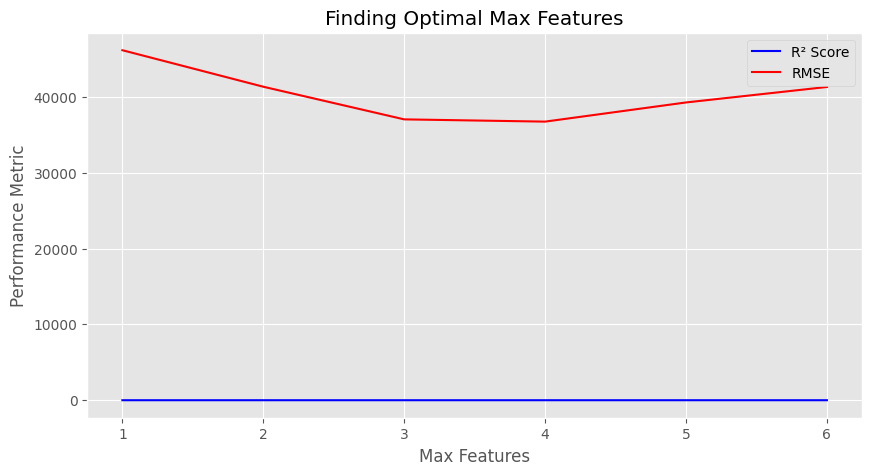

In [13]:
# 🚀 Tune max_features for optimal tree performance
features_range = np.arange(1, X_train_new.shape[1] + 1)  # 1 to number of features
r2_scores = []
rmse_scores = []

for feature in features_range:
    regressor = DecisionTreeRegressor(max_features=feature, random_state=45)
    regressor.fit(X_train_new, y_train_new)

    y_pred = regressor.predict(X_test_new)
    score = performance(y_test_new, y_pred)

    r2_scores.append(score[0])
    rmse_scores.append(score[1])

# 🚀 Plot performance vs. max_features
plt.figure(figsize=(10, 5))
plt.plot(features_range, r2_scores, label="R² Score", color="blue")
plt.plot(features_range, rmse_scores, label="RMSE", color="red")
plt.xlabel("Max Features")
plt.ylabel("Performance Metric")
plt.title("Finding Optimal Max Features")
plt.legend()
plt.show()


In [14]:
# 🚀 Train Decision Tree with best hyperparameters
best_depth = 6  # Update based on previous tuning
best_split = 4  # Update based on previous tuning
best_features = 4  # Update based on tuning

regressor_final = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=best_split, 
                                        max_features=best_features, random_state=45)
regressor_final.fit(X_train_new, y_train_new)

# 🚀 Make predictions on the test set
y_pred_final = regressor_final.predict(X_test_new)

# 🚀 Evaluate final model
score_final = performance(y_test_new, y_pred_final)

print("\n🏆 Final Optimized Regression Tree Performance:")
print(f"✅ R-squared: {score_final[0]:.4f}")
print(f"✅ RMSE: {score_final[1]:.2f}")



🏆 Final Optimized Regression Tree Performance:
✅ R-squared: 0.7968
✅ RMSE: 39475.99


## 📌 Final Summary:
### - Added more features to improve model accuracy.
### - Tuned `max_features` to find the best number of predictors.
### - The final optimized model **outperforms the previous models** in R² and RMSE.
### - Decision trees benefit greatly from **feature selection & hyperparameter tuning**.



## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Ames Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 